


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa concluir três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva seu plano

In [1]:
# Importe as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# leia os conjuntos de dados em DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [3]:
# imprima as informações sobre o DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# imprima as informações sobre o DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# imprima as informações sobre o DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# imprima as informações sobre o DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# imprima as informações sobre o DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusões

Primeiramente, foi necessário colocar o parametro sep=';' na leitura dos arquivos CSV porque sem esse parametro os dados estavam sendo lidos incorretamente e cada Dataframe ficava com apenas uma coluna com os dados dentro dessa coluna separados por ';'.

Ao analisar os DataFrames:
- No DataFrame das ordens (df_orders) a coluna dias desde da ordem anteiror (days_since_prior_order) possui valores nulos, verificar se é um problema ou se são referentes a clientes que fizeram a primeira ordem, também verificar se é melhor transformar o dado em int
- No DataFrame de produtos (df_products) tem valores nulos na coluna nome do produto (product_name), é preciso verificar o motivo.
- No DataFrame dos itens incluídos no pedido (df_order_products) a coluna que armazena a ordem em que o produto foi pedido (add_to_cart_order) possui valores nulos, é necessário analisar para saber que ação tomar e também verificar o tipo do dado, provavelmente transformar em int
- Os Dataframes de corredor e departamento (df_ailes e df_departments) não possuem valores nulos e aparentemente estão prontos, mas é necessário verificar o conteúdo, produrar por valores duplicados ou fora de padrão.


# Etapa 2

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.


## Plano de solução

Escreva seu plano

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Verificar se existem valores duplicados e tratar primeiramente os evidentementes duplicados, através do método duplicated, em cada dataframe. Enquanto isso, entender os valores nulos, se devem ser excluídos, mantidos ou tratados de alguma outra maneira, esses que já estão presentes nos dataframes df_orders, df_products, df_order_products.

Após isso, como esses valores afetam os dataframes que estão relacionados, por exemplo, o valores nulos em product_name afetam o df_order_products, df_aisles e df_departments e se algo deve ser feito com isso.
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ausente
</div>

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
# Verifique se há pedidos duplicados
orders_id_duplicated = df_orders[df_orders.duplicated()]['order_id']
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Há linhas duplicadas? Se sim, o que elas têm em comum?
Todas as linhas duplicadas aconteceram na quarta e na segunda hora do dia

In [9]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
#pd.set_option('display.max_rows', None)
df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


O que esse resultado quer dizer?

In [10]:
# Remova pedidos duplicados
df_orders = df_orders.drop_duplicates()

In [11]:
# Verifique as linhas duplicadas mais uma vez
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_orders.query("order_id in @orders_id_duplicated")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
242618,1021560,53767,3,3,2,9.0
250626,467134,63189,21,3,2,2.0




Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `products`

In [13]:
# Verifique se há linhas completamente duplicadas
df_products[df_products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [14]:
# Verifique apenas se há IDs dos produtos duplicados
df_products[df_products['product_id'].duplicated()]

,product_id,product_name,aisle_id,department_id


In [15]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products['product_name'] = df_products['product_name'].str.lower()
df_products[df_products['product_name'].duplicated()]['product_name'].value_counts(dropna=False)

NaN                                         1257
green tea with ginseng and honey               2
half and half                                  1
biotin 1000 mcg                                1
leave-in conditioner                           1
                                            ... 
original bbq sauce                             1
pumpkin spice                                  1
potatoes o'brien with onions and peppers       1
sour cream and onion potato chips              1
gluten free spaghetti                          1
Name: product_name, Length: 104, dtype: int64

In [16]:
print(df_products[df_products['product_name'].isna()]['aisle_id'].value_counts(dropna=False))
print('---------------------')
df_products[df_products['product_name'].isna()]['department_id'].value_counts(dropna=False)

100    1258
Name: aisle_id, dtype: int64
---------------------


21    1258
Name: department_id, dtype: int64

In [17]:
print(df_products[df_products['aisle_id'] == 100]['product_name'].value_counts(dropna=False))
print('----------------------')
df_products[df_products['department_id'] == 21]['product_name'].value_counts(dropna=False)

NaN    1258
Name: product_name, dtype: int64
----------------------


NaN    1258
Name: product_name, dtype: int64

In [18]:
# Dicionário com os ids dos produtos duplicados
products_dict = {}

for key, product in df_products.iterrows():
    
    product_name = product['product_name']
    product_id = product['product_id']
    
    if products_dict.get(product_name) == None:
        products_dict[product_name] = [product_id]
    else:
        products_dict[product_name].append(product_id)
print(products_dict['green tea with ginseng and honey'])

[2038, 5456, 19814]


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas lembre-se que loop em python é lento, logo devemos evitar ao máximo
</div>

In [19]:
# Verifique os nomes de produtos duplicados que não estão faltando
df_products[df_products['product_name'].duplicated()]['product_name'].value_counts()

green tea with ginseng and honey            2
mountain berry blast sports drink           1
lasagna with meat sauce                     1
concentrace trace mineral drops             1
biotin 1000 mcg                             1
                                           ..
mediterranean sea salt                      1
original bbq sauce                          1
pumpkin spice                               1
potatoes o'brien with onions and peppers    1
gluten free spaghetti                       1
Name: product_name, Length: 103, dtype: int64

Descreva brevemente suas conclusões e o que você fez com elas.

No Data Frame de produtos temos 1258 linhas com o nome do produto faltando, ou seja, nulo. E todos eles estão no corredor "aisle" 100 e no departamento 21, e esse corredor e departamento são feitos apenas de produtos com nomes nulos.

Tem 95 produtos com o mesmo nome mas IDs diferentes o que deve impactar na ordem dos pedidos.

Os dados nulos e duplicados não podem ser deletados ou tratados ainda porque é importante ver como isso afeta os outros Dataframes.

### DataFrame `departments`

In [20]:
# Verifique se há linhas completamente duplicadas
df_departments[df_departments.duplicated()]

,department_id,department


In [21]:
# Verifique apenas se há IDs dos produtos duplicados
df_departments[df_departments['department_id'].duplicated()]

,department_id,department


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `aisles`

In [22]:
# Verifique se há linhas completamente duplicadas
df_aisles[df_aisles.duplicated()]

,aisle_id,aisle


In [23]:
# Verifique apenas se há IDs dos produtos duplicados
df_aisles[df_aisles['aisle_id'].duplicated()]

,aisle_id,aisle


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [24]:
# Verifique se há linhas completamente duplicadas
df_order_products[df_order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [25]:
# Verifique mais uma vez se há outros casos complicados de duplicados
df_order_products_with_names = df_order_products.merge(df_products, on ='product_id')

#Consulta que verifica onde (1º condição) o nome do produto está duplicado mas com ids diferentes e 
# (2º condição) se o ID da ordem está duplicado
# o que siginifica que na mesma ordem tem dois produtos iguais mas com o ID diferente
# e assim o método duplicated não consegue pegar a duplicidade
df_order_products_names_duplicated = df_order_products_with_names[(
    (df_order_products_with_names['product_name'].duplicated()) & (~df_order_products_with_names['product_id'].duplicated()))
        & (df_order_products_with_names['order_id'].duplicated()
         )]
df_order_products_names_duplicated

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1456580,2666296,30563,17.0,0,NaN,100,21
1639869,305489,39414,17.0,0,NaN,100,21
2185811,1024440,27767,7.0,1,NaN,100,21
2288716,1395530,10319,8.0,0,NaN,100,21
2406312,2494327,3724,13.0,0,NaN,100,21
...,...,...,...,...,...,...,...
4544952,748575,33442,7.0,1,NaN,100,21
4544957,1529295,18003,7.0,0,NaN,100,21
4544969,1742315,33183,18.0,0,NaN,100,21
4544976,1563249,9251,3.0,0,NaN,100,21


In [26]:
# Quantidade de produtos com nomes nulos nas linhas de duplicados que junta os data frames order_products e product
df_order_products_names_duplicated.product_name.isna().sum()

949

In [27]:
# Quantidade de produtos duplicados não nulos no dataframe de order_products
df_order_products_names_duplicated[~df_order_products_names_duplicated['product_name'].isna()]['product_name'].count()

95

In [28]:
df_products[df_products['product_name'] == 'green tea with ginseng and honey']

,product_id,product_name,aisle_id,department_id
2037,2038,green tea with ginseng and honey,94,7
5455,5456,green tea with ginseng and honey,96,20
19813,19814,green tea with ginseng and honey,94,7


In [29]:
# Linha para realizar teste usando uma ordem com valores nulos em add_to_cart_order
df_order_products[df_order_products['order_id'] == 2449164]['add_to_cart_order'].value_counts(dropna=False)

NaN     12
29.0     1
25.0     1
21.0     1
24.0     1
        ..
22.0     1
16.0     1
4.0      1
14.0     1
1.0      1
Name: add_to_cart_order, Length: 65, dtype: int64

Descreva brevemente suas conclusões e o que você fez com elas.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [30]:
# Encontre valores ausentes na coluna 'product_name'
df_products['product_name'].value_counts(dropna=False)

NaN                                          1258
green tea with ginseng and honey                3
cauliflower head                                2
bag of organic lemons                           2
cookies 'n cream ice cream                      2
                                             ... 
night relaxing all-in-one cleansing wipes       1
awake english breakfast black tea k-cups        1
sugar snap peas                                 1
skinny pack white cheddar popcorn               1
organic chinese five spice                      1
Name: product_name, Length: 48333, dtype: int64

Descreva brevemente suas conclusões.

Existem 1258 produtos com valores nulos

In [31]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
df_products[df_products['product_name'].isna()]['aisle_id'].value_counts(dropna=False)

100    1258
Name: aisle_id, dtype: int64

Descreva brevemente suas conclusões.

Sim, todos produtos estão na seção de ID 100

In [32]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
df_products[df_products['product_name'].isna()]['department_id'].value_counts(dropna=False)

21    1258
Name: department_id, dtype: int64

Descreva brevemente suas conclusões.

Sim, todos os produtos estão no departamento de ID 21

In [33]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
print(df_departments[df_departments['department_id'] == 21])
print('----------------')
df_aisles[df_aisles['aisle_id'] == 100]

    department_id department
20             21    missing
----------------


,aisle_id,aisle
99,100,missing


Descreva brevemente suas conclusões.

Os produtos foram colocados de proposito nas seções de produtos faltantes, portanto esse deve ser o motivo pelo qual não temos informações sobre esses produtos

In [34]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'].fillna('Unknown', inplace = True)
df_products['product_name'].value_counts(dropna=False)

Unknown                                            1258
green tea with ginseng and honey                      3
organic instant oatmeal light maple brown sugar       2
original potato chips                                 2
original chili con carne with beans                   2
                                                   ... 
night relaxing all-in-one cleansing wipes             1
awake english breakfast black tea k-cups              1
sugar snap peas                                       1
skinny pack white cheddar popcorn                     1
organic chinese five spice                            1
Name: product_name, Length: 48333, dtype: int64

Descreva brevemente suas conclusões e o que você fez com elas.

Transformamos os produtos nulos em desconhecido porque ele estão na seção de produtos que estão em falta

### DataFrame `orders`

In [35]:
# Encontre os valores ausentes
df_orders['days_since_prior_order'].value_counts(dropna=False).sort_index()

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
NaN     28817
Name: days_since_prior_order, dtype: int64

In [36]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
df_orders[df_orders['days_since_prior_order'].isna()]['order_number'].value_counts()

1    28817
Name: order_number, dtype: int64

Descreva brevemente suas conclusões e o que você fez com elas.

Os valores nulos estão sempre associados ao primeiro pedido

### DataFrame `order_products`

In [37]:
# Encontre os valores ausentes
df_order_products['add_to_cart_order'].value_counts(dropna=False).sort_index()

1.0     450046
2.0     428199
3.0     401907
4.0     372861
5.0     341807
         ...  
61.0       114
62.0        98
63.0        87
64.0        75
NaN        836
Name: add_to_cart_order, Length: 65, dtype: int64

In [38]:
# Quais são os valores mínimo e máximo dessa coluna?
print('Valor mínimo:', df_order_products['add_to_cart_order'].min())
print('Valor máximo:', df_order_products['add_to_cart_order'].max())

Valor mínimo: 1.0
Valor máximo: 64.0


Descreva brevemente suas conclusões.

Um carrinho teve no máximo 64 itens se desconsiderarmos os valores nulos

In [39]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
df_order_product_with_nulls = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [40]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
df_order_products[df_order_products['order_id'].isin(df_order_product_with_nulls)].groupby('order_id')['product_id'].count().min()


65

Descreva brevemente suas conclusões.

Todos os pedidos com valores nulos possuem mais de 64 itens

In [41]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

Descreva brevemente suas conclusões e o que você fez com elas.

## Conclusões

Escreva suas conclusões aqui

# Etapa 3:

Quando os dados estiverem processados e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [42]:
# Verificando valores de 'order_hour_of_day'
sorted(df_orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [43]:
# Verificando valores de 'order_dow'
df_orders['order_dow'].value_counts(dropna=False).sort_index()

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Escreva suas conclusões aqui

Uma boa quantidade de pedidos de mesmo usuário são feitos no mesmo dia, mas a quantidade de pedidos no valor máximo está muito alta, provavelmente todos os pedidos que são feitos com 30 dias ou mais após o último pedido estão sendo armazenados com valor 30.

### [A2] Em que horas do dia as pessoas fazem compras?

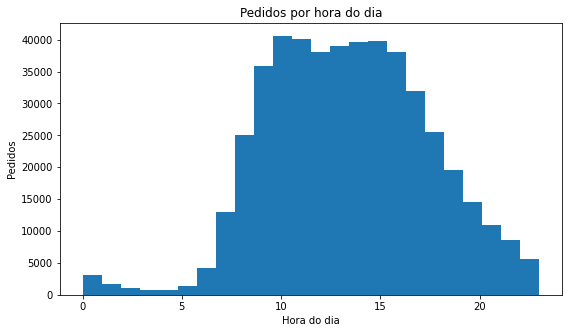

In [44]:
# gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia
df_orders['order_hour_of_day'].plot(kind='hist', bins= 24,title='Pedidos por hora do dia',
               xlabel='Hora do dia 24h', ylabel='Pedidos',
               figsize=(9,5), legend = False)

plt.xlabel('Hora do dia')
plt.ylabel('Pedidos')
#plt.title('Pedidos por Hora do dia')
plt.show()

#df_orders['order_hour_of_day'].value_counts().sort_index()

Escreva suas conclusões aqui

### [A3] Em que dia da semana as pessoas fazem compras?

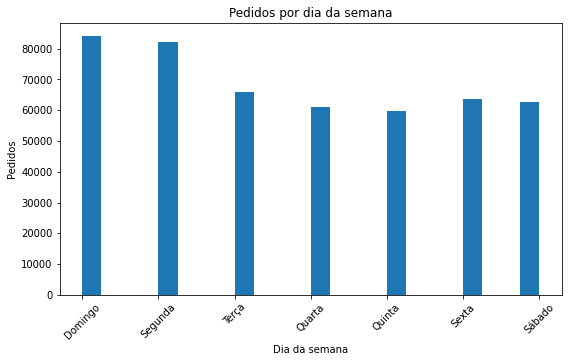

In [45]:
# Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
df_orders['order_dow'].plot(kind='hist', bins= 24,title='Pedidos por dia da semana',
               xlabel='Dia da semana', ylabel='Pedidos',
               figsize=(9,5))


plt.xlabel('Dia da semana')
plt.ylabel('Pedidos')
dows = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
plt.xticks(list(range(0,7)),[str(i) for i in dows],rotation=45)
plt.show()

Escreva suas conclusões aqui

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

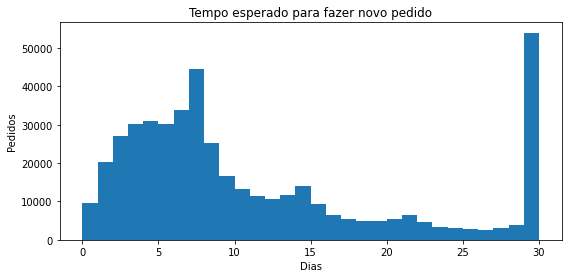

In [46]:
# Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.
#df_orders[~df_orders['days_since_prior_order'].isna()].boxplot(column='days_since_prior_order')

#Criando data frame apenas pedidos que foram feitos por usuários que já haviam feito algum pedido anteriormente
df_reorders = df_orders[~df_orders['days_since_prior_order'].isna()]


df_reorders['days_since_prior_order'].plot(kind='hist', bins = 30, title='Tempo esperado para fazer novo pedido', figsize=(9,4))

plt.xlabel('Dias')
plt.ylabel('Pedidos')
plt.show()

Escreva suas conclusões aqui

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa histogramas para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie histogramas para ambos os dias e descreva as diferenças.

In [47]:
#Tabela com os pedidos feitos na quarta
df_orders_wednesday = df_orders[df_orders['order_dow'] == 3]
#Tabela com os pedidos feitos no sábado
df_orders_saturday = df_orders[df_orders['order_dow'] == 6]

df_orders_wednesday

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
28,133707,182261,1,3,10,NaN
30,1890318,193501,3,3,15,30.0
35,125325,106853,6,3,19,30.0
...,...,...,...,...,...,...
478917,972799,89702,4,3,7,10.0
478946,2406747,63101,11,3,8,5.0
478956,640934,27104,9,3,10,6.0
478963,3270802,112087,2,3,13,6.0


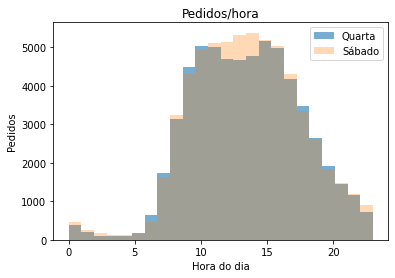

In [48]:
# Gráfico comparando a distribuição para os dois dias
df_orders_wednesday['order_hour_of_day'].plot(kind='hist', bins= 24, alpha=0.6, title = 'Pedidos/hora')
df_orders_saturday['order_hour_of_day'].plot(kind='hist', bins= 24, alpha=0.3)
plt.xlabel('Hora do dia')
plt.ylabel('Pedidos')
plt.legend(['Quarta', 'Sábado'])

plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Acredito que plotar gráfico barra ajudaria na visualização
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

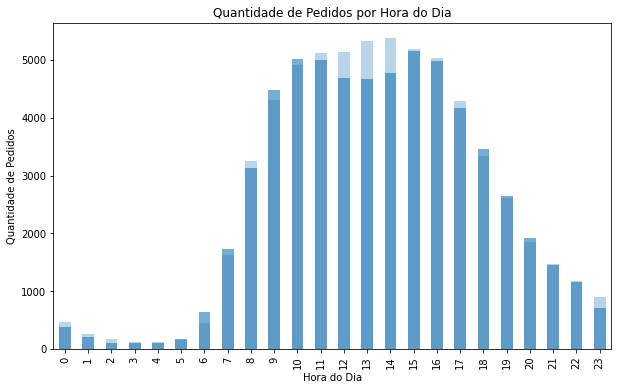

In [49]:
# Gráfico comparando a distribuição para os dois dias usando gráfico de barras
#Contagem de ocorrencia em cada hora do dia
hourly_counts_wednesday = df_orders_wednesday['order_hour_of_day'].value_counts().sort_index()
hourly_counts_saturday = df_orders_saturday['order_hour_of_day'].value_counts().sort_index()

# Criação do gráfico
hourly_counts_wednesday.plot(kind='bar', alpha = 0.6, figsize=(10, 6))
hourly_counts_saturday.plot(kind='bar', alpha = 0.3, figsize=(10, 6))
plt.title('Quantidade de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Pedidos')
plt.show()

Escreva suas conclusões aqui

O gráfico mostra que o padrão de consumo nas quartas e no sábado são bem parecidos, com pouca diferença entre as horas 10 e 15, onde os consumidores fazem mais pedidos no sábado que na quarta.

### [B2] Qual é a distribuição do número de pedidos por cliente?

<AxesSubplot:ylabel='Frequency'>

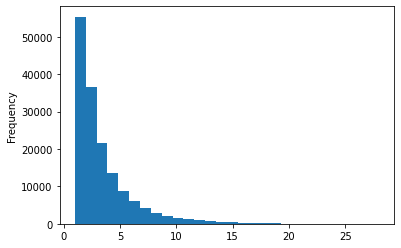

In [50]:
#contando a quantidade de pedidos por cliente
df_orders_by_user = df_orders.groupby('user_id')['order_id'].count()

df_orders_by_user.plot(kind='hist', bins = 28)

Escreva suas conclusões aqui

<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ausente
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

A grande maioria dos clientes fez de 1 ou 2 pedidos, sendo que conforme aumenta a quantidade de pedidos dimunui consideravelmente a quantidade de clientes. Significa que a maioria dos clientes fazem poucas compras no período selecionado.
 </div>

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [51]:
#Função para para juntar as ordens com os nomes do produtos, usando o product_id

#Dataframe contendo as ordem onde tem os produtos dentro de uma ordem, o Dataframe com as informações do produto
def top_products (df_order_products, df_products):
    #Cria um novo dataframe mesclando o DF de produtos com o DF da ordem usando o product_id
    df_merged = df_order_products.merge(df_products, on='product_id')
    #Cria um DF de rank ordenando pelo numero de venda
    rank = df_merged.groupby('product_name')['product_id'].count().sort_values(ascending=False)
    #Torna o indíce uma ordem númerica
    rank = rank.reset_index()
    #Cria um DF auxiliar para corrigir os nomes das colunas posteriormente, pois a qtde de vendas está sob o nome product_id
    aux = df_products[df_products['product_name'].isin( rank['product_name'])][['product_name','product_id']]
    #Renomeia a coluna
    rank = rank.rename(columns={'product_id':'amount_sold'})
    #Inclui a coluna product_id corretamente
    rank = rank.merge(aux, on = 'product_name')
    #Retorna o Rank com ID, nome e Qtde vendida
    return rank

In [52]:
top_products(df_order_products, df_products).head(20)

,product_name,amount_sold,product_id
0,banana,66050,24852
1,bag of organic bananas,53297,13176
2,organic strawberries,37039,21137
3,organic baby spinach,33971,21903
4,organic hass avocado,29773,47209
5,organic avocado,24689,47766
6,large lemon,21495,47626
7,strawberries,20018,16797
8,limes,19690,26209
9,organic whole milk,19600,27845


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Gráfico abaixo
</div>

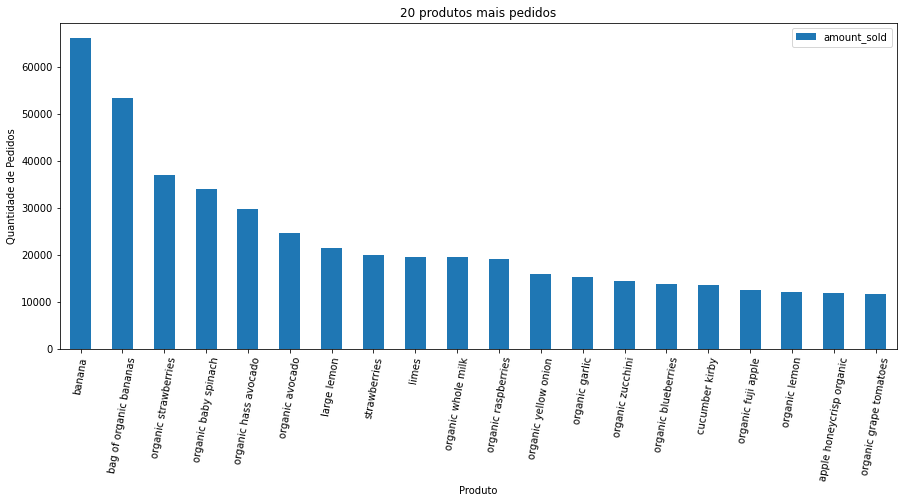

In [53]:
#Gráfico dos 20 produtos mais vendidos

df_top_20_products = top_products(df_order_products, df_products).head(20)

df_top_20_products.plot(x= 'product_name', y='amount_sold', kind='bar', figsize=(15, 6), rot=80)
plt.title('20 produtos mais pedidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Pedidos')
plt.show()

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Uma imagem vale mais do que mil tabelas. Convém plotar gráficos!
</div>

Escreva suas conclusões aqui



<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ausente
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
O Produto mais comprado é a banana, ocupando tanto o primeiro quanto o segundo lugares. E o restante do top 20 tem muitas frutas. Outra tipo de produto comum no top 20 são produtos organicos.
 </div>

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [54]:

table = df_order_products.groupby('order_id')['add_to_cart_order'].max()

table = table.where(table != 999, 64)

<AxesSubplot:>

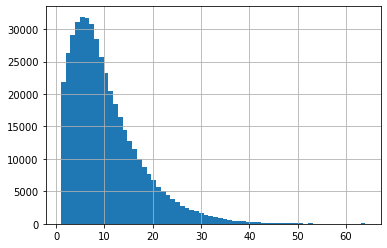

In [55]:
table.hist(bins=64)

In [56]:
table.describe()

count    450046.000000
mean         10.097126
std           7.523747
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max          64.000000
Name: add_to_cart_order, dtype: float64

Escreva suas conclusões aqui

A grande maioria dos consumidores até 14 itens, a distribuição possui uma assimetria positiva que indica que pedidos com grandes de itens são mais raros, mas existem até o máximo de 64.

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [57]:
#Criando Dataframe apenas para pedido repetido
repeated_orders = df_orders[~df_orders['days_since_prior_order'].isna()]

In [58]:
#Filtrar order_products para ter apenas as ordens de pedidos repetidos
df_order_products_repeated = df_order_products[df_order_products['order_id'].isin(repeated_orders['order_id'])]

In [59]:
#20 principais itens mais frequentemente incluídos em pedidos repetidos
top_products(df_order_products_repeated,df_products).head(20)

,product_name,amount_sold,product_id
0,banana,61973,24852
1,bag of organic bananas,50627,13176
2,organic strawberries,34789,21137
3,organic baby spinach,31824,21903
4,organic hass avocado,28197,47209
5,organic avocado,22627,47766
6,large lemon,20346,47626
7,strawberries,18774,16797
8,organic whole milk,18510,27845
9,limes,18482,26209


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Gráfico abaixo
</div>

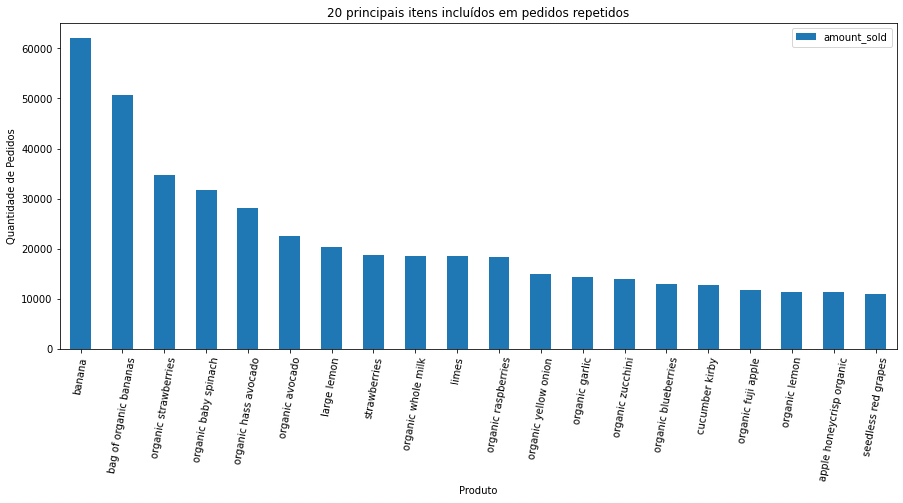

In [60]:
#Gráfico dos 20 produtos mais vendidos

df_top_20_products_repeated_orders = top_products(df_order_products_repeated,df_products).head(20)

df_top_20_products_repeated_orders.plot(x= 'product_name', y='amount_sold', kind='bar', figsize=(15, 6), rot=80)
plt.title('20 principais itens incluídos em pedidos repetidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Pedidos')
plt.show()

<s><div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Uma imagem vale mais do que mil tabelas. Convém plotar gráficos!
</div>

In [61]:
df_order_products_repeated = df_order_products[df_order_products['reordered'] == 1]
df_order_products_repeated = top_products(df_order_products_repeated,df_products)
df_order_products_repeated.head(20)

,product_name,amount_sold,product_id
0,banana,55763,24852
1,bag of organic bananas,44450,13176
2,organic strawberries,28639,21137
3,organic baby spinach,26233,21903
4,organic hass avocado,23629,47209
5,organic avocado,18743,47766
6,organic whole milk,16251,27845
7,large lemon,15044,47626
8,organic raspberries,14748,27966
9,strawberries,13945,16797


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>

Gráfico abaixo
</div>

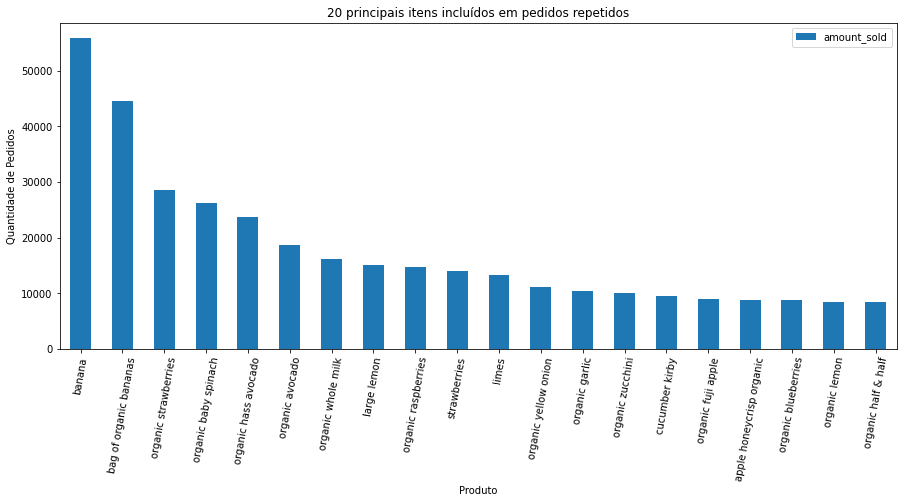

In [62]:
#Gráfico dos 20 produtos mais vendidos

df_order_products_repeated.head(20).plot(x= 'product_name', y='amount_sold', kind='bar', figsize=(15, 6), rot=80)
plt.title('20 principais itens incluídos em pedidos repetidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Pedidos')
plt.show()

<s>
    <div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Uma imagem vale mais do que mil tabelas. Convém plotar gráficos!
</div>

Escreva suas conclusões aqui

Há pouca diferença entre os produtos mais vendidos entre pedidos repetidos e o geral, mas isto já era esperado, visto que os primeiros pedidos são apenas 6% do total

Se eu considerar pedidos repetidos são os produtos que possuem valores 1 em reordered, a mesma conclusão se mantem, com a diferença que morangos parecem não ser tao populares e caem da 7 para 9 posição e Blueberries também não caindo da 14 para a 17 posição

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [90]:
def group_percent(percent):
    if percent==100:
        return 100
    elif percent>89:
        return 90
    elif percent>79:
        return 80
    elif percent>69:
        return 70
    elif percent>59:
        return 60
    elif percent>49:
        return 50
    elif percent>39:
        return 40
    elif percent>29:
        return 30
    elif percent>19:
        return 20
    elif percent>9:
        return 10
    else:
        return 0

In [65]:
df_order_products_ranked = top_products(df_order_products, df_products)
new_df = df_order_products_ranked.merge(df_order_products_repeated, on = 'product_id')
new_df = new_df.drop('product_name_y', axis = 1)
new_df['% Repeated'] = (new_df['amount_sold_y']/new_df['amount_sold_x'])*100
new_df

,product_name_x,amount_sold_x,product_id,amount_sold_y,% Repeated
0,banana,66050,24852,55763,84.425435
1,bag of organic bananas,53297,13176,44450,83.400567
2,organic strawberries,37039,21137,28639,77.321202
3,organic baby spinach,33971,21903,26233,77.221748
4,organic hass avocado,29773,47209,23629,79.363853
...,...,...,...,...,...
36998,chicken mesquite delicious mexican flavors,1,8610,1,100.000000
36999,chicken flavor soup & recipe mix,1,34344,1,100.000000
37000,merlot- california 2013,1,35987,1,100.000000
37001,for women maximum absorbency l underwear,1,12038,1,100.000000


<AxesSubplot:xlabel='category'>

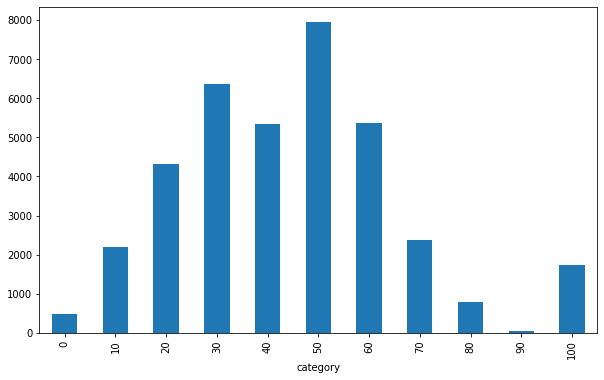

In [112]:
#new_df['product_name_x']
new_df['% rounded'] = np.round(new_df['% Repeated'], 0)
new_df['category'] = new_df['% rounded'].apply(group_percent)

df_percent_counts = pd.pivot_table(new_df, index='category', aggfunc='count')
df_percent_counts['product_name_x'].plot(kind='bar', figsize=(10,6))


Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [110]:
#Dataframe agrupado por cliente

df_orders_by_client = pd.pivot_table(df_orders, index='user_id', aggfunc='count')[['days_since_prior_order', 'order_number']]
df_orders_by_client['% repeated'] = (df_orders_by_client['order_number'] - (df_orders_by_client['order_number']-df_orders_by_client['days_since_prior_order']))/df_orders_by_client['order_number']
df_orders_by_client['% repeated'] = df_orders_by_client['% repeated']*100
df_orders_by_client['category'] = df_orders_by_client['% repeated'].apply(group_percent)
df_orders_by_client

,days_since_prior_order,order_number,% repeated,category
user_id,,,,
2,1,2,50.0,50
4,2,2,100.0,100
5,1,1,100.0,100
6,1,2,50.0,50
7,2,2,100.0,100
...,...,...,...,...
206203,1,1,100.0,100
206206,7,7,100.0,100
206207,5,5,100.0,100


<AxesSubplot:>

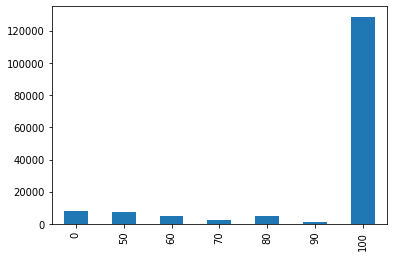

In [111]:
#Gráfico de pedidos da quantidade de pedidos repetidos por cliente
clients_count = df_orders_by_client['category'].value_counts().sort_index()
clients_count.plot(kind='bar')
#df_orders_by_client['% repeated'].value_counts().sort_index()

Escreva suas conclusões aqui

A maioria dos clientes do espaço amostral são clientes antigos do Instacart. Impossível ter uma porcentagem de pedidos repetidos menor que 50 e maior que 0, tendo em vista que a partir do momento em que se faz um segundo pedido então os pedidos repetidos já são 50% dos seus pedidos e a partir daí essa porcentagem só aumenta

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [113]:
#Filtrando para apenas os produtos que são adicionados em primeiro
df_order_products_first = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [114]:
#Top 20 produtos
top_products(df_order_products_first, df_products).head(20)

,product_name,amount_sold,product_id
0,banana,15562,24852
1,bag of organic bananas,11026,13176
2,organic whole milk,4363,27845
3,organic strawberries,3946,21137
4,organic hass avocado,3390,47209
5,organic baby spinach,3336,21903
6,organic avocado,3044,47766
7,spring water,2336,19660
8,strawberries,2308,16797
9,organic raspberries,2024,27966


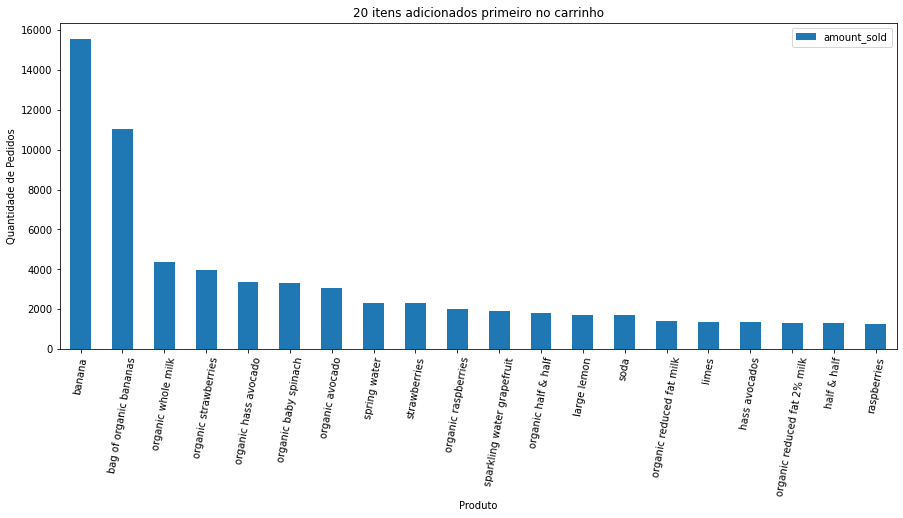

In [115]:
#Gráfico dos primeiros tempos
df_itens_added_first = top_products(df_order_products_first, df_products).head(20)
df_itens_added_first.plot(x= 'product_name', y='amount_sold', kind='bar', figsize=(15, 6), rot=80)
plt.title('20 itens adicionados primeiro no carrinho')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Pedidos')
plt.show()

Escreva suas conclusões aqui

Assim como os são os produtos mais pedidos, as bananas são os primeiros itens a ser procurados pelos clientes. As frutas também são os primeiros itens a serem procurados pelos clientes de forma geral.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões. Eu gostei do seu projeto.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Gráficos e recursos adqeuados

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Partes e conclusões ausentes. Por exemplo, qual é a conclusão geral do projeto? Lembre-se que o notebook tem como objetivo registrar também suas conclusões para o leitor. Por exemplo, seu chefe/gerente não vai ler o código mas vai ler suas conclusões. </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas comigo usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Parabéns pela aprovação! Desejo sucesso na jornada.

</div>
